In [12]:
import sklearn
from sklearn.manifold import TSNE
RS = 20150101

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
gene_df = pd.read_csv("GSM2629342_AB1443.txt", comment="#", sep="\t") 
gene_df = gene_df.T
gene_df["new_column"] = pd.Series(range(len(gene_df)))
gene_count = len(gene_df["new_column"])
del gene_df["new_column"]


X = np.vstack([gene_df.iloc[i] for i in range(gene_count)])
Y = np.hstack([gene_df[i] for i in gene_df.iloc[0].keys()])



In [13]:
digits = TSNE(random_state=0, n_components=2).fit_transform(X)

<IPython.core.display.Javascript object>


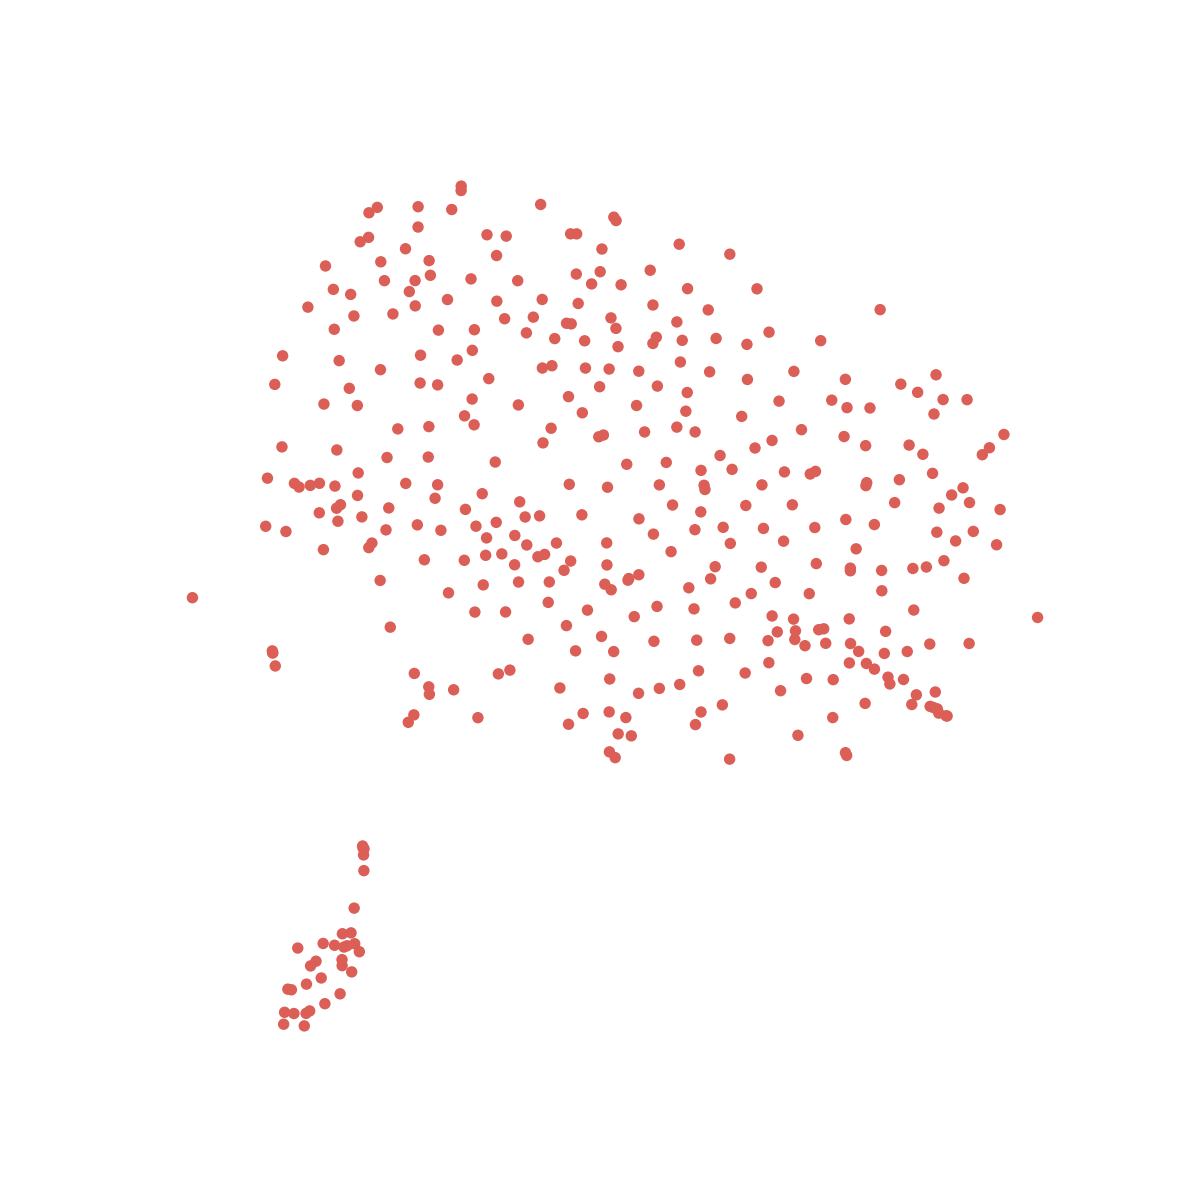

In [14]:
def scatter(x, colors):

    palette = np.array(sns.color_palette("hls", 1000))

    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=30, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    return f, ax, sc

scatter(digits, Y)
plt.legend()
plt.show()

In [5]:
plt.savefig('digits_tsne-generated.png', dpi=500)